In [12]:
# This command is for adding seaborn package to online Jupiter ;)

!pip install seaborn

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [13]:
# We import seaborn, which is the only library necessary for this simple example

import seaborn as sns

# We apply the default default seaborn theme, scaling, and color palette
# This uses the matplotlib rcParam system and will affect how all matplotlib plots look, even if you don’t make them with seaborn. Beyond the default theme, there are several other options, and you can independently control the style and scaling of the plot to quickly translate your work between presentation contexts

sns.set()

# Load the example datasets 
# In pandas we use the  pandas.read_csv()

tips = sns.load_dataset("tips")

tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

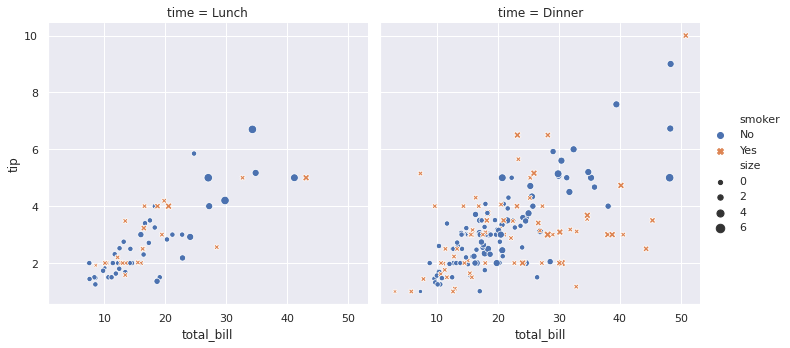

In [14]:
# Draw a faceted scatter plot with multiple semantic variables

sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);

This particular plot shows the relationship between five variables in the tips dataset. Three are numeric, and two are categorical. Two numeric variables (total_bill and tip) determined the position of each point on the axes, and the third (size) determined the size of each point. One categorical variable split the dataset onto two different axes (facets), and the other determined the color and shape of each point.

All of this was accomplished using a single call to the seaborn function relplot(). Notice how we only provided the names of the variables in the dataset and the roles that we wanted them to play in the plot. Unlike when using matplotlib directly, it wasn’t necessary to translate the variables into parameters of the visualization (e.g., the specific color or marker to use for each category). That translation was done automatically by seaborn. This lets the user stay focused on the question they want the plot to answer.


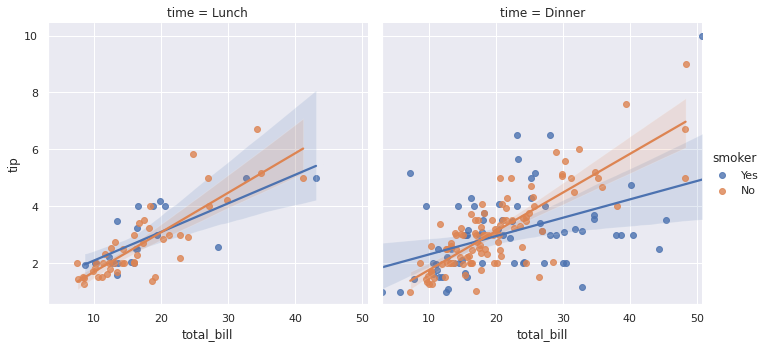

In [15]:
# Statistical estimation and error bars

sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker",
           data=tips);

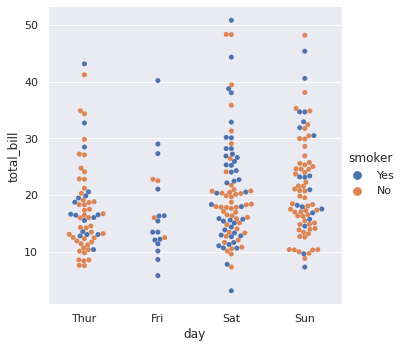

In [16]:
# Specialized categorical plots

# Standard scatter and line plots visualize relationships between numerical variables, but many data analyses involve categorical variables. There are several specialized plot types in seaborn that are optimized for visualizing this kind of data. They can be accessed through catplot()

sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="swarm", data=tips);

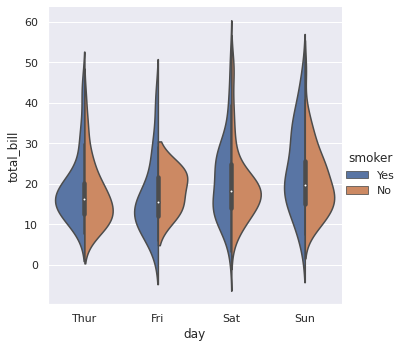

In [17]:
# You could use kernel density estimation to represent the underlying distribution that the points are sampled from

sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="violin", split=True, data=tips);

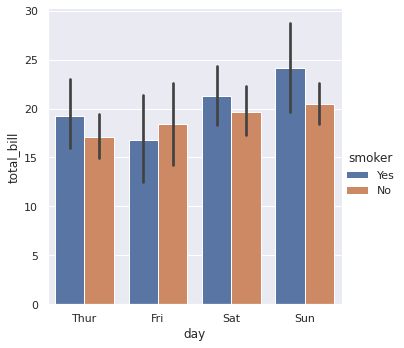

In [18]:
# You could show the only mean value and its confidence interval within each nested category

sns.catplot(x="day", y="total_bill", hue="smoker",
            kind="bar", data=tips);

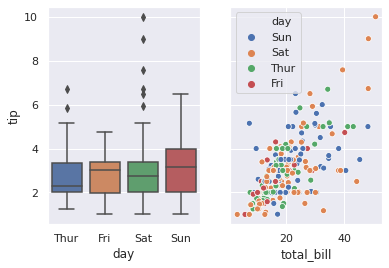

In [19]:
# Figure-level and axes-level functions

# How do these tools work? It’s important to know about a major distinction between seaborn plotting functions. All of the plots shown so far have been made with “figure-level” functions. These are optimized for exploratory analysis because they set up the matplotlib figure containing the plot(s) and make it easy to spread out the visualization across multiple axes. They also handle some tricky business like putting the legend outside the axes. To do these things, they use a seaborn FacetGrid.

# Each different figure-level plot kind combines a particular “axes-level” function with the FacetGrid object. For example, the scatter plots are drawn using the scatterplot() function, and the bar plots are drawn using the barplot() function. These functions are called “axes-level” because they draw onto a single matplotlib axes and don’t otherwise affect the rest of the figure.

# The upshot is that the figure-level function needs to control the figure it lives in, while axes-level functions can be combined into a more complex matplotlib figure with other axes that may or may not have seaborn plots on them:

import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(x="day", y="tip", data=tips, ax=axes[0])
sns.scatterplot(x="total_bill", y="tip", hue="day", data=tips, ax=axes[1]);


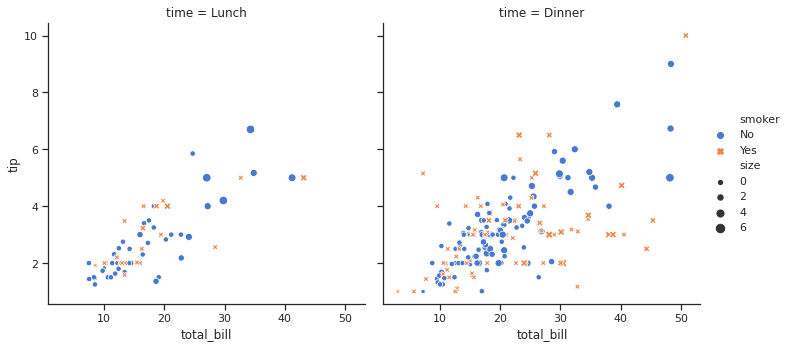

In [20]:
# Customizing plot appearance

sns.set(style="ticks", palette="muted")
sns.relplot(x="total_bill", y="tip", col="time",
            hue="smoker", style="smoker", size="size",
            data=tips);


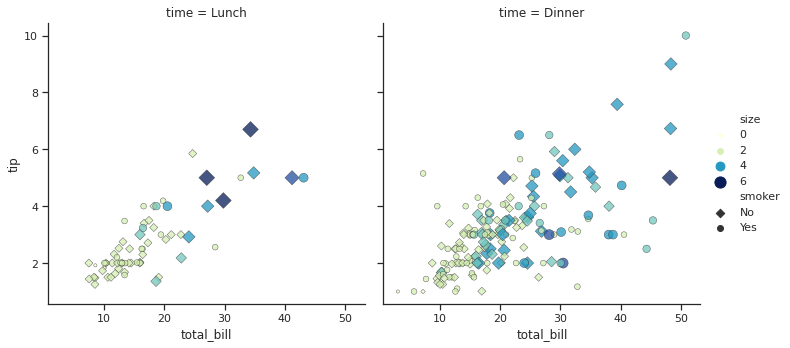

In [21]:
sns.relplot(x="total_bill", y="tip", col="time",
            hue="size", style="smoker", size="size",
            palette="YlGnBu", markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75,
            data=tips);

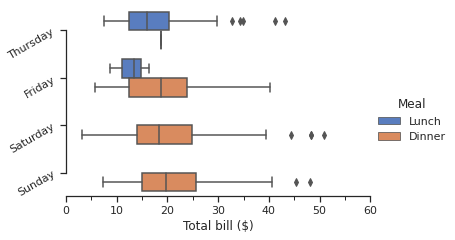

In [22]:
g = sns.catplot(x="total_bill", y="day", hue="time",
                height=3.5, aspect=1.5,
                kind="box", legend=False, data=tips);
g.add_legend(title="Meal")
g.set_axis_labels("Total bill ($)", "")
g.set(xlim=(0, 60), yticklabels=["Thursday", "Friday", "Saturday", "Sunday"])
g.despine(trim=True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor=True);
plt.setp(g.ax.get_yticklabels(), rotation=30);
